<a href="https://colab.research.google.com/github/josimarviana/pesquisaoperacional/blob/main/sapateiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalar pulp, necessário apenas na primeira execução
#!pip install pulp

In [ ]:
# importando PuLP (pode ser instalado com pip install, por exemplo, no prompt do anaconda)
from pulp import *


In [ ]:
# use a função LpProblem para inicializar uma declaração do nosso problema de otimização linear
problema =  LpProblem("Sapateiro", LpMaximize)



In [ ]:
# usando as variáveis ​​de otimização do módulo PuLP devem ser declaradas com a função LpVariable
x1 = LpVariable("x1",lowBound = 0) 
x2 = LpVariable("x2",lowBound = 0) 



In [ ]:
# usando o operador += podemos adicionar a função objetivo ao problema declarado
problema += 5*x1 + 2*x2 



In [ ]:
# mesma abordagem é válida para adicionar restrições
problema += 2*x1 + x2 <= 6
problema += 10*x1 + 12*x2 <= 60
problema += x1 >= 0
problema += x2 >= 0



In [ ]:
# podemos revisar nosso problema agora
problema

Sapateiro:
MAXIMIZE
5*x1 + 2*x2 + 0
SUBJECT TO
_C1: 2 x1 + x2 <= 6

_C2: 10 x1 + 12 x2 <= 60

_C3: x1 >= 0

_C4: x2 >= 0

VARIABLES
x1 Continuous
x2 Continuous

In [ ]:
# resolve o problema, usando o solver PuLP padrão para problemas de otimização linear contínua
solution = problema.solve()


In [ ]:

# veja se a execução da otimização foi bem sucedida, usando LpStatus do módulo PuLP
LpStatus[solution]

'Optimal'

In [ ]:
# o valor ótimo da função objetivo é acessado com a função valor da seguinte maneira
print("O valor ótimo da função é = ", value(problema.objective)) 

O valor ótimo da função é =  15.0


In [ ]:
#acessando os valores das variáveis
for v in problema.variables():
    print (v.name, "=", v.varValue)

x1 = 3.0
x2 = 0.0


In [ ]:
# a solução ótima para x1 também é acessada com a função value (mas já temos x1 como manipulador)
value(x1)

3.0

In [ ]:
# por último, abaixo mostro a solução ideal para x2
value(x2)

0.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

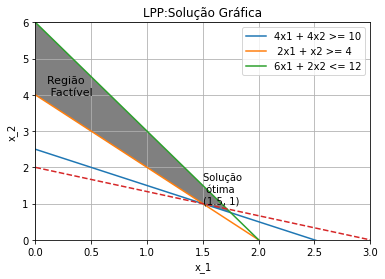

In [ ]:
# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, 2.5 - x, label = '4x1 + 4x2 >= 10')
plt.plot(x, 4 - 2 * x, label= ' 2x1 + x2 >= 4')
plt.plot(x, 6 - 3 * x, label = '6x1 + 2x2 <= 12')
plt.plot(x, 2 - 2/3*x, '--')

# Define the boundaries of the feasible area in the plot
x = [0, 1.5, 1.75, 0]
y = [4, 1, 0.75, 6]
plt.fill(x, y, 'grey')

plt.text(0.1, 4, 'Região \n Factível', size = '11')
plt.annotate('Solução \n ótima\n(1.5, 1)', xy = (1.5, 1.0))

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title('LPP:Solução Gráfica')
plt.axis([0, 3, 0, 6])
plt.grid(True)
plt.legend()
plt.show()

